In [29]:
from dataclasses import dataclass
import re

data = """
p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3
""".strip()

WIDTH = 11  # 101 actually.
HEIGHT = 7  # 103 actually.

with open("input_14", "r") as file:
    data = file.read().strip()

WIDTH = 101
HEIGHT = 103

TIME = 100

@dataclass
class Robot:
    position: tuple[int, int]
    velocity: tuple[int, int]

def parse_robot(line: str) -> Robot:
    robot_data = re.compile(r"p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)")
    m = robot_data.match(line)
    return Robot((int(m.group(1)), int(m.group(2))), (int(m.group(3)), int(m.group(4))))


robots = [parse_robot(line) for line in data.splitlines()]

def calculate_position(robot, time, width, height):
    initial_x, initial_y = robot.position
    v_x, v_y = robot.velocity
    final_x = (initial_x + v_x * time) % width
    final_y = (initial_y + v_y * time) % height
    return final_x, final_y

positions = [calculate_position(robot, TIME, WIDTH, HEIGHT) for robot in robots]

def assign_quadrant(position, width, height):
    # 2 | 1
    # - | -
    # 3 | 4
    # 
    # None if on the edge.

    x, y = position
    if y < height // 2:
        if x < width // 2:
            return 2
        elif x > width // 2:
            return 1
    if y > height // 2:
        if x < width // 2:
            return 3
        if x > width // 2:
            return 4
    return None

quadrants = dict()

for position in positions:
    quadrant = assign_quadrant(position, WIDTH, HEIGHT)
    if quadrant is not None:
        if quadrant not in quadrants:
            quadrants[quadrant] = 1
        else:
            quadrants[quadrant] += 1

safety_factor = 1
for quadrant in quadrants:
    safety_factor *= quadrants[quadrant]

print(safety_factor)

def robots_to_string(robots, width, height):
    area = [["." for _ in range(width)] for _ in range(height)]
    for robot in robots:
        x, y = robot.position
        area[y][x] = "O"
    return "\n".join("".join(row) for row in area)

def move_robots(robots, times, width, height):
    for robot in robots:
        new_x, new_y = calculate_position(robot, times, width, height)
        robot.position = (new_x, new_y)

def robots_to_matrix(robots):
    matrix = []
    for robot in robots:
        x, y = robot.position
        matrix.append([x, y])
    return matrix

import numpy as np
import matplotlib.pyplot as plt

averages = []
variances = []
for i in range(10_000):
    move_robots(robots, 1, WIDTH, HEIGHT)
    matrix = robots_to_matrix(robots)
    mu, sigma = np.mean(matrix, axis=0), np.std(matrix, axis=0, ddof=0)
    averages.append(mu)
    variances.append(sigma)

218295000


In [25]:
# averages = np.concatenate(averages, axis=0)

In [30]:
averages[:10]

[array([51.716, 51.948]),
 array([51.528, 50.76 ]),
 array([49.926, 50.19 ]),
 array([52.162, 49.208]),
 array([49.752, 52.964]),
 array([46.332, 52.6  ]),
 array([48.972, 52.236]),
 array([51.208, 52.49 ]),
 array([51.02 , 53.156]),
 array([49.014, 49.908])]

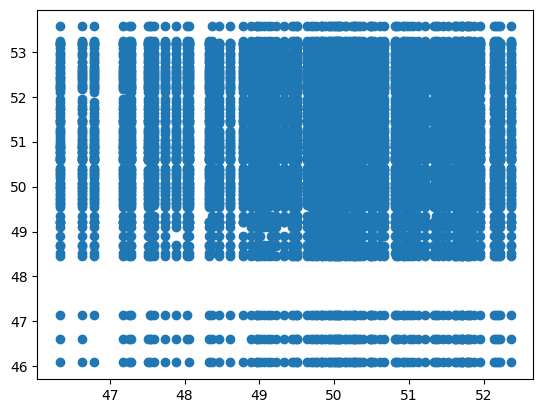

In [35]:
plt.scatter(np.stack(averages)[:, 0], np.stack(averages)[:, 1])

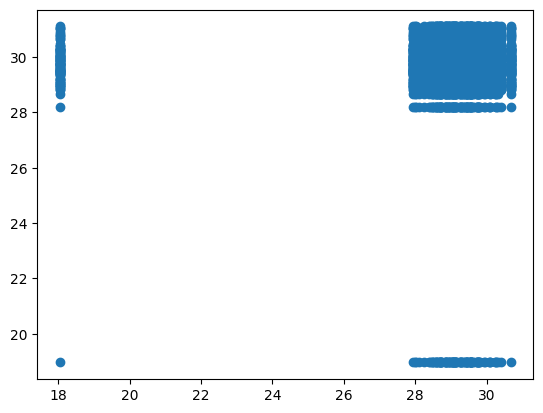

In [36]:
plt.scatter(np.stack(variances)[:, 0], np.stack(variances)[:, 1])

In [38]:
for i, variance in enumerate(variances):
    if variance[0] < 20 and variance[1] < 20:
        print(i)
    

6869


In [39]:
robots = [parse_robot(line) for line in data.splitlines()]

In [40]:
move_robots(robots, 6868, WIDTH, HEIGHT)

In [41]:
print(robots_to_string(robots, WIDTH, HEIGHT))

...O................O...........................O....................................................
....................................................................................................O
........O......................O...O..................................OO.............................
............O.................O.................................................O.........O..........
O.......................................O.........................................O..................
.......................O.............................................................................
........O..O....................................................O....................................
....O.......O..............................O.....O.......O...O..............O........................
.................O...............O.......................O.O.....O........O..........................
....O........................................O....O...............................

In [42]:
move_robots(robots, 1, WIDTH, HEIGHT)

In [43]:
print(robots_to_string(robots, WIDTH, HEIGHT))

............................O...................................................O....................
..O......O..........................O.O.............O.................O....O.........O...............
.......O..........................................................O.......O........O...O..OO.........
.O.............................................................O.........O..........................O
.....................O....O................................................................O.........
...........O............................................O....................O........O....O.........
...........O..................................................O.......O..........O...................
..........................................O..............O............O...........O.................O
................O.............O..............O.......................................................
O........O.....................O...........................................O......

In [44]:
move_robots(robots, 1, WIDTH, HEIGHT)

In [45]:
print(robots_to_string(robots, WIDTH, HEIGHT))

..............................O......................................................................
.........................................................................O...........................
.....................................................................................................
.......................................................................O..........................O..
................................................O...........O............O........O..................
..................................O................................O..O..............................
.......................................................................O.............................
O....................................................................................................
..O....................................................O.............................................
................O....O...................O.....O..................................